# Code Alpha Task: 01  (Titanic Classification) <br> Name: Mohammed Umaid

### Importing libraries and dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
ds = pd.read_csv(r"C:/Users/Umaid/train_and_test2.csv")
ds.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [8]:
ds.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [9]:
ds["zero"].sum()

np.int64(0)

In [10]:
for i in ds.columns:
    if ds[f"{i}"].sum()==0:
        ds.drop(f"{i}", axis=1, inplace=True)
ds.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   float64
 8   2urvived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [12]:
ds.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [13]:
ds.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [14]:
ds.fillna(ds.Embarked.mean(), inplace = True)
ds.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

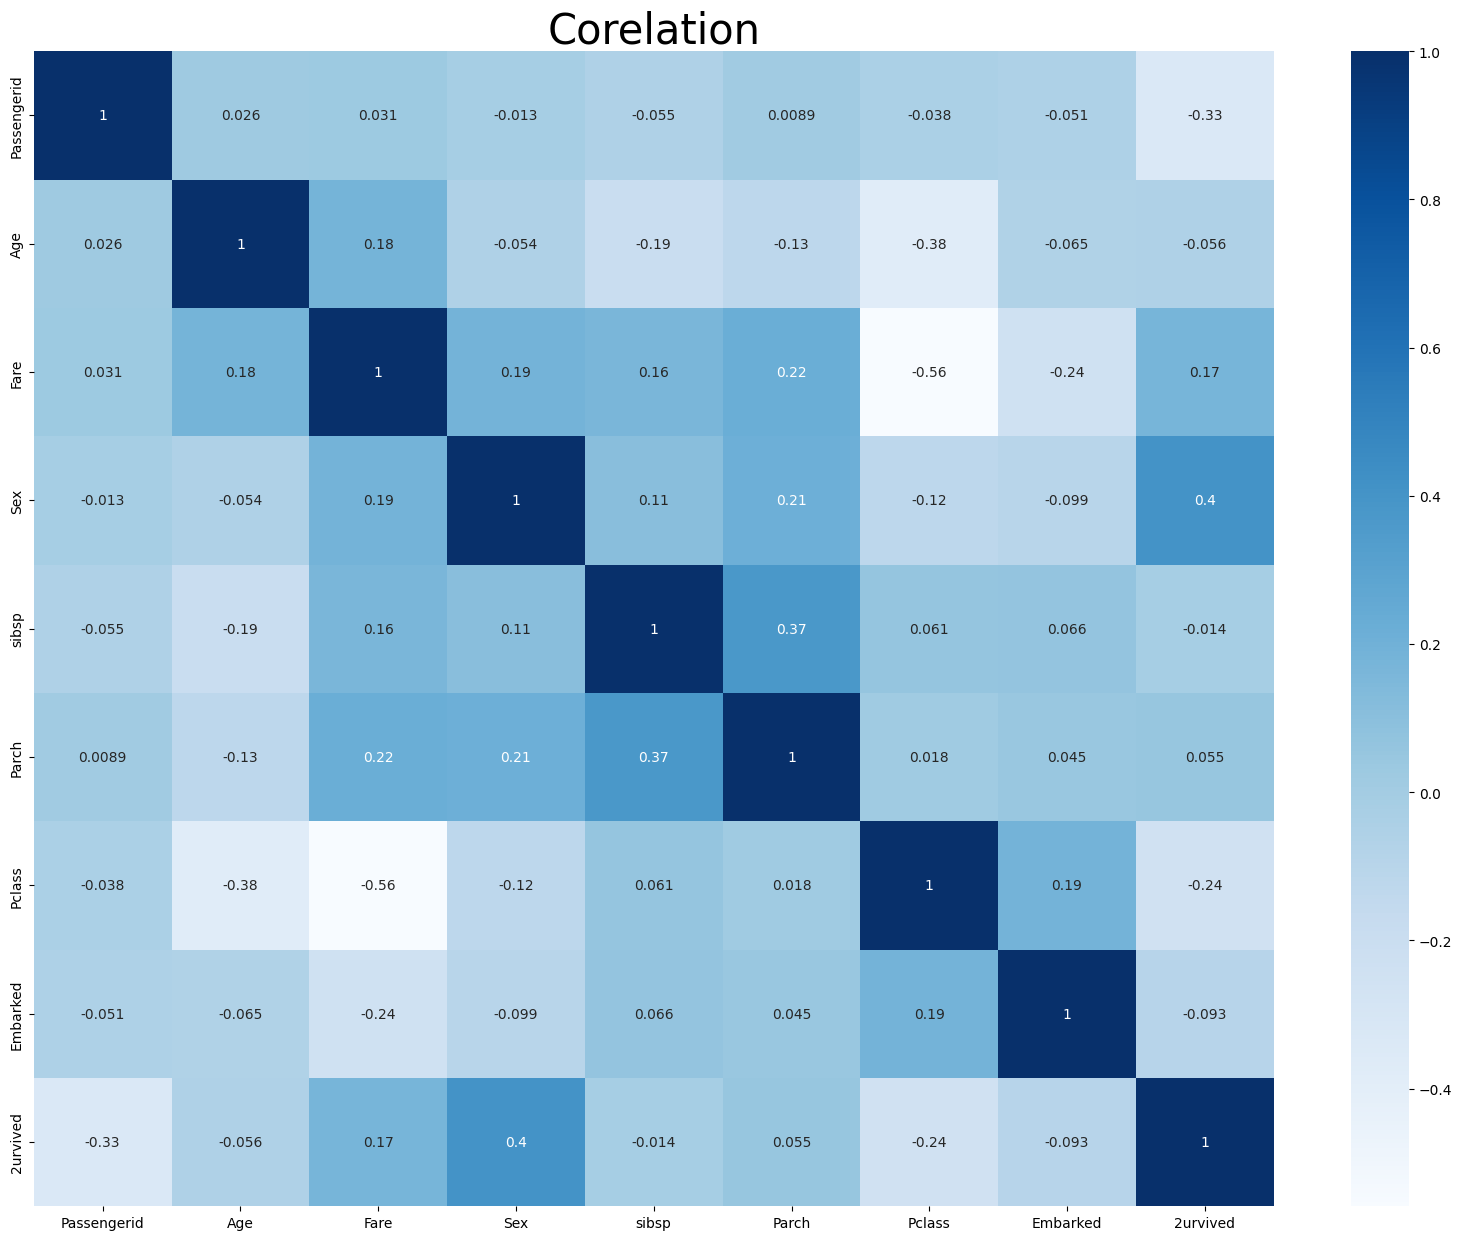

In [15]:
plt.figure(figsize=(20, 15))
sns.heatmap(ds.corr(), annot=True, cmap='Blues')
plt.title("Corelation", size=30)
plt.show()

In [16]:
ds.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


<Axes: >

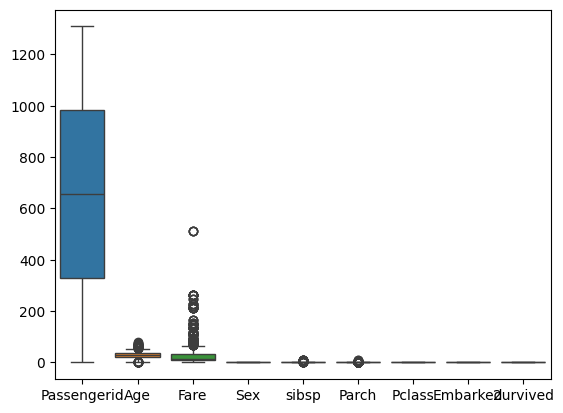

In [17]:
sns.boxplot(ds)

In [18]:
ds.shape

(1309, 9)

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


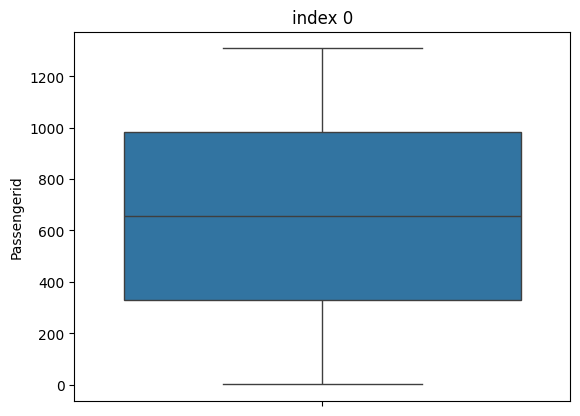

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


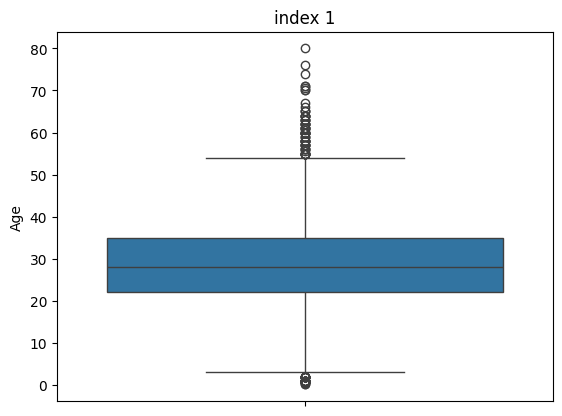

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


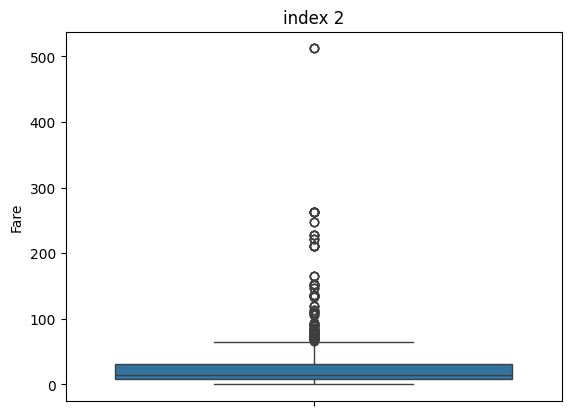

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


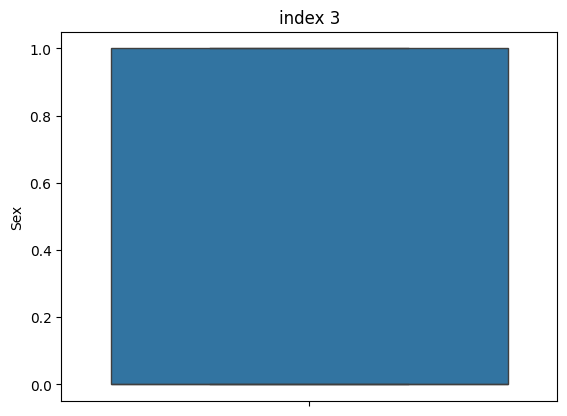

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


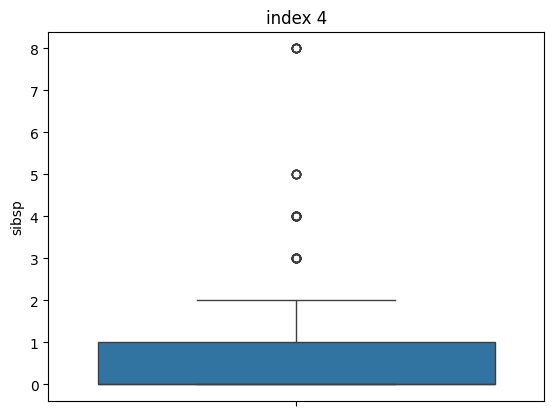

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


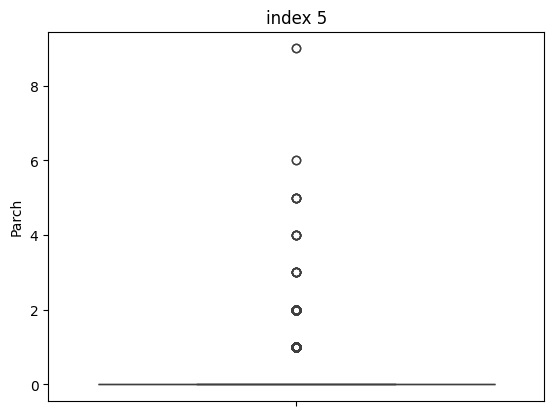

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


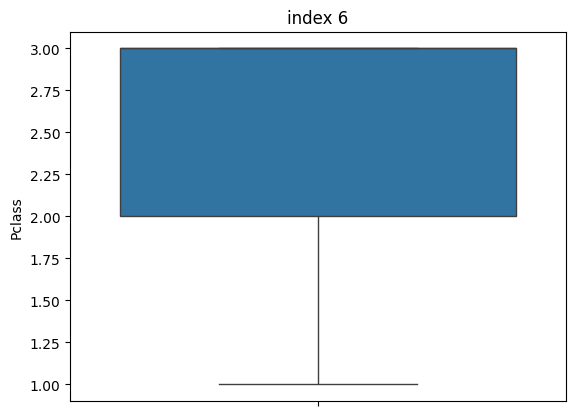

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


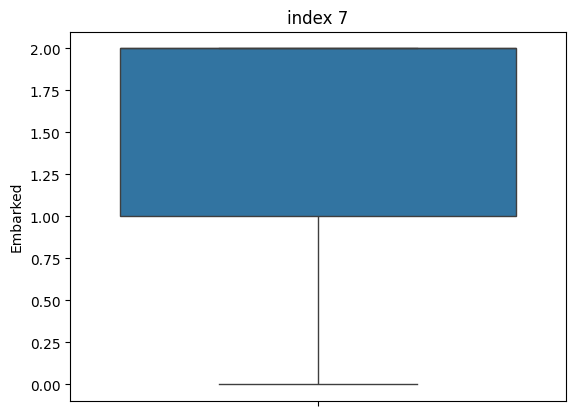

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\609771275.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type(ds.loc[i][0]) == np.float64:


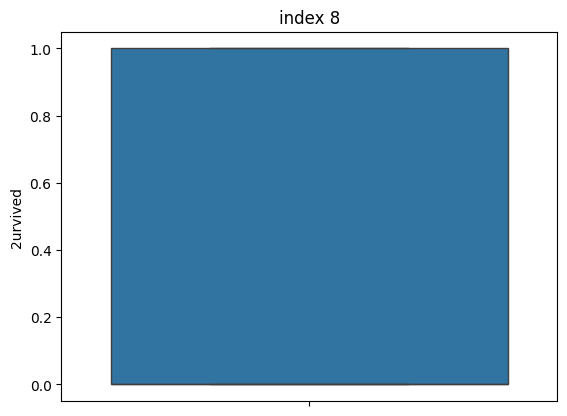

In [19]:
for i in range(9):
    if type(ds.loc[i][0]) == np.float64:
        sns.boxplot(ds.iloc[:,i])
        plt.title(f"index {i}")
        plt.show()

In [20]:
type(ds.loc[5][0])

C:\Users\Umaid\AppData\Local\Temp\ipykernel_1064\1310563379.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(ds.loc[5][0])


numpy.float64

In [21]:
ds.loc[1].describe()

count     9.000000
mean     12.809256
std      25.141141
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      71.283300
Name: 1, dtype: float64

In [22]:
ds.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [23]:
ds.loc[12]

Passengerid    13.00
Age            20.00
Fare            8.05
Sex             0.00
sibsp           0.00
Parch           0.00
Pclass          3.00
Embarked        2.00
2urvived        0.00
Name: 12, dtype: float64

<Axes: ylabel='Fare'>

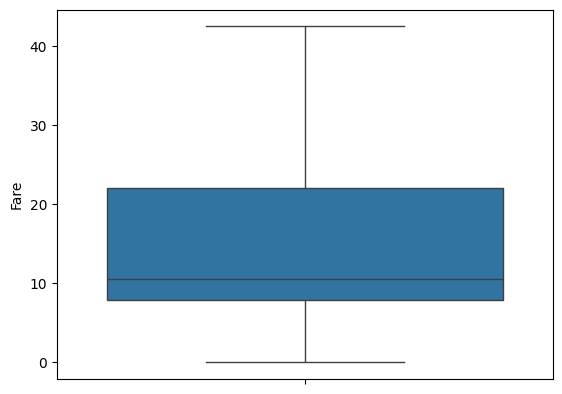

In [24]:
sns.boxplot(ds.Fare[ds.Fare < 45])

<Axes: ylabel='Fare'>

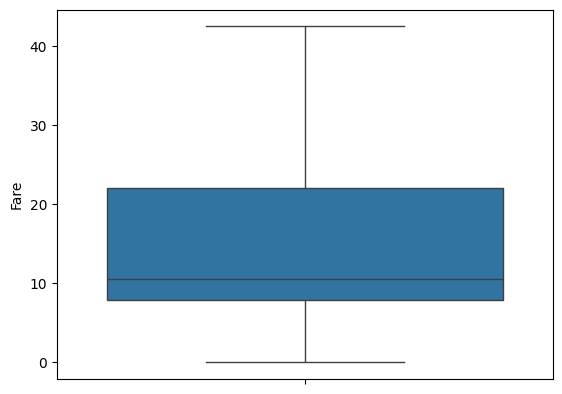

In [25]:
indexes = ds[ (ds['Fare'] >= 45)].index
ds.drop(indexes , inplace=True)
sns.boxplot(ds.Fare)

<Axes: ylabel='sibsp'>

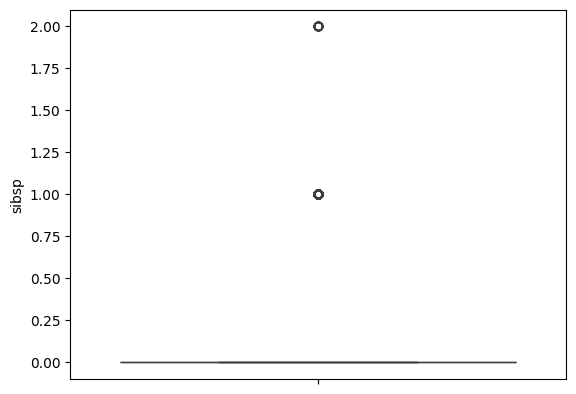

In [26]:
sns.boxplot(ds.sibsp[ds.sibsp < 3])

<Axes: ylabel='sibsp'>

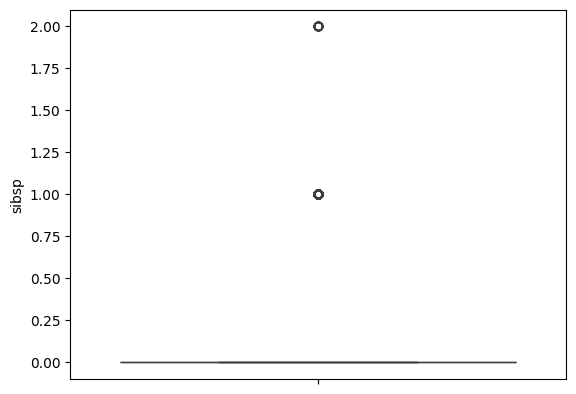

In [27]:
indexes = ds[ (ds['sibsp'] >= 3)].index
ds.drop(indexes , inplace=True)
sns.boxplot(ds.sibsp)

In [28]:
ds.Age.describe()

count    1015.000000
mean       28.769212
std        11.761752
min         0.170000
25%        22.000000
50%        28.000000
75%        33.000000
max        80.000000
Name: Age, dtype: float64

In [29]:
ds.Parch.unique()

array([0, 2, 1, 5, 3, 4])

In [30]:
(ds.Parch==3).sum()

np.int64(6)

<Axes: ylabel='Parch'>

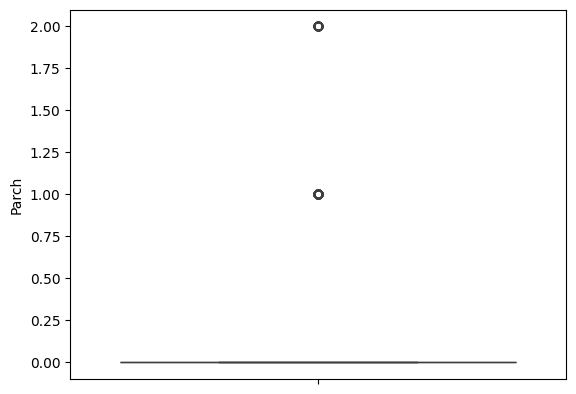

In [31]:
indexes = ds[ (ds.Parch >= 3)].index
ds.drop(indexes , inplace=True)
sns.boxplot(ds.Parch)

In [32]:
ds.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
2,3,26.0,7.9250,1,0,0,3,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
5,6,28.0,8.4583,0,0,0,3,1.0,0
8,9,27.0,11.1333,1,0,2,3,2.0,1


In [33]:
x = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].values
print("x shape:",x.shape,"\ny shape:",y.shape)

x shape: (999, 7) 
y shape: (999,)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,
                                                    random_state=13)
print("x train shape:",x_train.shape,
      "\ny train shape:",y_train.shape,
      "\nx test shape:",x_test.shape,
      "\ny test shape:",y_test.shape)

x train shape: (799, 7) 
y train shape: (799,) 
x test shape: (200, 7) 
y test shape: (200,)


# Logistic Regression

In [35]:
model = LogisticRegression()
model.fit(x_train,y_train)
yp = model.predict(x_test)

In [36]:
test_accuracy = accuracy_score(yp,y_test)*100
train_accuracy = accuracy_score(model.predict(x_train),y_train)*100
print("Training accuracy:",round(train_accuracy,2),"%",
      "\nTesting accuracy:",round(test_accuracy,2),"%")

Training accuracy: 79.22 % 
Testing accuracy: 80.0 %


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
yp = model.predict(x_test)
test_accuracy = accuracy_score(yp,y_test)*100
train_accuracy = accuracy_score(model.predict(x_train),y_train)*100
print("Training accuracy:",round(train_accuracy,2),"%",
      "\nTesting accuracy:",round(test_accuracy,2),"%")

Training accuracy: 97.37 % 
Testing accuracy: 74.5 %


# Random Forest
### (Best Accuracy)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
yp = model.predict(x_test)
test_accuracy = accuracy_score(yp,y_test)*100
train_accuracy = accuracy_score(model.predict(x_train),y_train)*100
print("Training accuracy:",round(train_accuracy,2),"%",
      "\nTesting accuracy:",round(test_accuracy,2),"%")

Training accuracy: 97.37 % 
Testing accuracy: 78.5 %


Text(50.722222222222214, 0.5, 'Predicted values')

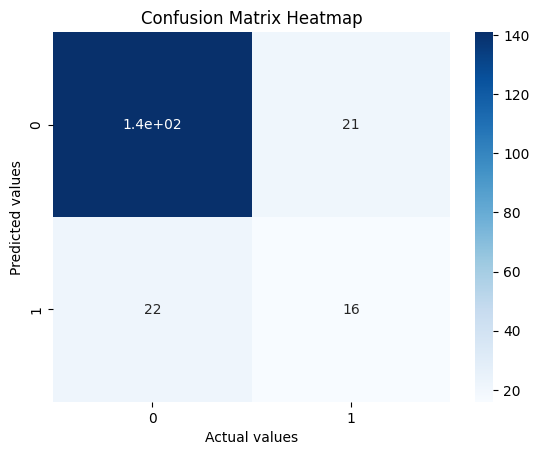

In [39]:
sns.heatmap(confusion_matrix(yp,y_test), annot=True, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [40]:
print("Classification Report")
print(classification_report(yp,y_test))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       162
           1       0.43      0.42      0.43        38

    accuracy                           0.79       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.78      0.79      0.78       200



In [43]:
pwd

'C:\\Users\\Umaid'